In [10]:
### Generate Dummy Circle to Test with
circle = []
x= -1
while x <= 1:
    y=-1
    while y <= 1:
        if .75 <= x**2 + y**2 <= 1.25:
            circle.append((x,y))
        y += .25
    x += .25

In [11]:
#### Create Dummy Cover of circle

Cover = []
for i in range(4):
    x_i = []
    for x in circle:
        if -1+i*.5 <=x[1] <=-1+(i+1)*.5:
            x_i.append(x)
    Cover.append(x_i)  
for i in range(5):
    x_i = []
    for x in circle:
        if -1.25+i*.5 <= x[1] <= -1.25+(i+1)*.5:
            x_i.append(x)
    Cover.append(x_i) 
    



In [12]:
#### Components of Cover

from sklearn.cluster import KMeans
import numpy as np

def new_cover(Cover, k ):
    New_Cover = []
    for x in Cover:
        kmeans = KMeans(n_clusters=k, random_state=0).fit(x)   
        for i in range(k):
            x_i = []
            for j in range(len(x)):
                if kmeans.labels_[j] == i:
                    x_i.append(x[j])
            New_Cover.append(x_i)
    return New_Cover
    

In [13]:

### Intersection Function

def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 

In [14]:
### gives n X n matrix of 3's
def random_matrix_maker(n):
    matrix = []
    for i in range(n):
        row = []
        for j in range(n):
            row.append(3)
        matrix.append(row)
    return matrix

In [15]:
#### Cover to adjacency matrix
def cover_to_adj_matrix(Cover,k):
    X = new_cover(Cover,k)
    n = len(new_cover(Cover,k))
    matrix = random_matrix_maker(n)
    for i in range(n):
        for j in range(n):
            if len(intersection(X[i],X[j])) > 0:
                matrix[i][j] = 1
            else: matrix[i][j] = 0
    return matrix

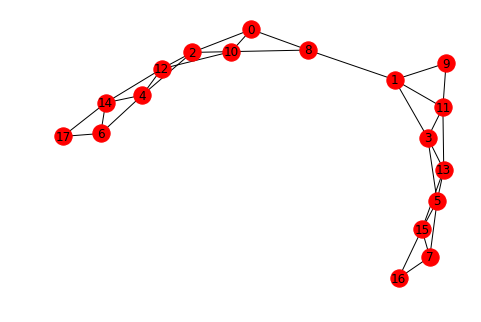

In [16]:

#### Matrix to Graph

import networkx as nx
import numpy as np

A = cover_to_adj_matrix(Cover,2)

G = nx.from_numpy_matrix(np.array(A)) 
nx.draw(G, with_labels=True)


In [17]:

##### Testing Function

def testing(Cover, k=2):
    X = new_cover(Cover,k)
    print(X)
    A = cover_to_adj_matrix(Cover,k)
    G = nx.from_numpy_matrix(np.array(A)) 
    nx.draw(G, with_labels=True)